# ROAD CRASHES IN SOUTH AUSTRALIA

_Author: Clara Le_

_Date created: 12/10/2024_

---


In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()
sns.set_theme(style="white")

In [2]:
# Load sweetviz
!pip install sweetviz
import sweetviz as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.5 MB/s eta 0:00:00


## Data loading and Data cleaning

In [3]:
# Load the dataset
crash_sa = pd.read_csv('/content/sample_data/2018-2022_DATA_SA_Crash.csv')

In [4]:
# The 20 first rows of the dataset
crash_sa.head(n=20)

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,...,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC,Crash Date Time
0,2018-1-12/07/2023,2 Metropolitan,MITCHELL PARK,5043,CC MARION.,4,0,0,0,0,...,2,Driver Rider,1: PDO,No Control,NaN,NaN,1324362.05,1662130.48,1.324362e+13,10/10/2018 11:20:00
1,2018-2-12/07/2023,2 Metropolitan,GLANVILLE,5015,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,2,Driver Rider,1: PDO,No Control,NaN,NaN,1319117.45,1679740.62,1.319117e+13,1/1/2018 0:45:00
2,2018-3-12/07/2023,2 Metropolitan,GOLDEN GROVE,5125,CITY OF TEA TREE GULLY,2,0,0,0,0,...,1,Driver Rider,1: PDO,Traffic Signals,NaN,NaN,1337889.71,1685361.47,1.337890e+13,1/1/2018 2:14:00
3,2018-4-12/07/2023,2 Metropolitan,ELIZABETH SOUTH,5112,CITY OF PLAYFORD.,2,4,0,1,3,...,1,Driver Rider,3: SI,Traffic Signals,NaN,NaN,1334568.88,1691271.22,1.334569e+13,1/1/2018 2:26:00
4,2018-5-12/07/2023,2 Metropolitan,CROYDON,5008,CITY OF CHARLES STURT,2,3,0,0,3,...,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1325517.03,1673428.59,1.325517e+13,1/1/2018 4:00:00
5,2018-6-12/07/2023,2 Metropolitan,ELIZABETH VALE,5112,CITY OF PLAYFORD.,4,0,0,0,0,...,1,Driver Rider,1: PDO,No Control,NaN,NaN,1335007.27,1691025.15,1.335007e+13,1/1/2018 4:00:00
6,2018-7-12/07/2023,2 Metropolitan,PETERHEAD,5016,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,1,Driver Rider,1: PDO,No Control,Y,NaN,1320123.13,1681698.96,1.320123e+13,1/1/2018 6:45:00
7,2018-8-12/07/2023,2 Metropolitan,BIRDWOOD,5234,THE BAROSSA COUNCIL.,2,1,0,0,1,...,1,Driver Rider,2: MI,No Control,NaN,Y,1368988.00,1681637.44,1.368988e+13,1/1/2018 5:45:00
8,2018-9-12/07/2023,2 Metropolitan,KENSINGTON,5068,"CC OF NORWOOD,PAYNEHAM & ST PETERS",3,0,0,0,0,...,1,Driver Rider,1: PDO,Traffic Signals,NaN,NaN,1332259.75,1671076.47,1.332260e+13,1/1/2018 10:00:00
9,2018-10-12/07/2023,3 Country,MOUNT PLEASANT,5235,THE BAROSSA COUNCIL.,3,0,0,0,0,...,1,Driver Rider,1: PDO,No Control,NaN,NaN,1366983.02,1687358.97,1.366983e+13,1/1/2018 10:45:00


In [5]:
# Show columns of the dataset
crash_sa.columns

Index(['REPORT_ID', 'Stats Area', 'Suburb', 'Postcode', 'LGA Name',
       'Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI',
       'Year', 'Month', 'Day', 'Time', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved', 'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC',
       'Crash Date Time'],
      dtype='object')

In [6]:
# Check if there is any duplicated Report_ID
crash_sa['REPORT_ID'].duplicated().any()

False

In [7]:
# The quantity of road crashes in each Stats Area
crash_sa['Stats Area'].value_counts(dropna = False)

,count
Stats Area,
2 Metropolitan,50951
3 Country,9673
1 City,2977


In [8]:
# The quantity of road crashes in each Suburb
crash_sa['Suburb'].value_counts(dropna = False)

,count
Suburb,
ADELAIDE,2455
PROSPECT,746
GEPPS CROSS,630
NORWOOD,604
NORTH ADELAIDE,602
...,...
BROOKER,1
WERTALOONA,1
CUSTON,1


In [9]:
# The quantity of road crashes in each Postcode
crash_sa['Postcode'].value_counts(dropna = False)

,count
Postcode,
5000,2460
5108,1251
5094,1108
5112,1098
5082,1014
...,...
5310,1
5220,1
5420,1


In [10]:
# Remove invalid postcodes since postcode of SA starts with 5
crash_sa = crash_sa[crash_sa.Postcode >= 5000]

In [11]:
# Check unique combinations of suburb and Postcode
df = crash_sa[['Suburb', 'Postcode']][~crash_sa[['Suburb', 'Postcode']].duplicated(keep = 'first')]
df[~df.duplicated(subset='Suburb', keep = False)].sort_values(by = ['Suburb', 'Postcode'])

,Suburb,Postcode
963,ABERFOYLE PARK,5159
10998,ABMINGA STATION,5440
10,ADELAIDE,5000
344,ADELAIDE AIRPORT,5950
9457,AGERY,5558
...,...,...
2295,YOUNGHUSBAND,5238
59749,YOUNGHUSBAND HOLDINGS,5238
2772,YUMALI,5261
29834,YUNDI,5172


In [12]:
# List of suburb which has more than 1 postcode
duplicate_postcode = df[df.duplicated(subset='Suburb', keep = False)].sort_values(['Suburb', 'Postcode'])
duplicate_postcode

,Suburb,Postcode
23998,BEVERLEY,5008
301,BEVERLEY,5009
27876,BURNSIDE,5064
61,BURNSIDE,5066
19389,CHRISTIES BEACH,5164
...,...,...
532,VALLEY VIEW,5093
281,WAYVILLE,5034
32792,WAYVILLE,5035
18872,WYNN VALE,5092


In [13]:
# A table of postcodes frequency (for each suburb having duplicated postcodes)
list_duplicate_postcode = duplicate_postcode['Suburb'].drop_duplicates()
clean_postcode = pd.DataFrame(crash_sa[crash_sa['Suburb'].isin(list_duplicate_postcode)][['Suburb', 'Postcode']].groupby(['Suburb', 'Postcode']).value_counts()).reset_index()
clean_postcode

,Suburb,Postcode,count
0,BEVERLEY,5008,2
1,BEVERLEY,5009,119
2,BURNSIDE,5064,1
3,BURNSIDE,5066,73
4,CHRISTIES BEACH,5164,1
...,...,...,...
78,VALLEY VIEW,5093,204
79,WAYVILLE,5034,180
80,WAYVILLE,5035,4
81,WYNN VALE,5092,1


In [14]:
# Modify postcodes by using the most frequent postcode used for specific suburbs
unique_postcode = clean_postcode.sort_values(['Suburb', 'count'], ascending = True).groupby('Suburb').tail(n=1).reset_index()[['Suburb', 'Postcode']]
unique_postcode

,Suburb,Postcode
0,BEVERLEY,5009
1,BURNSIDE,5066
2,CHRISTIES BEACH,5165
3,CLARENCE GARDENS,5039
4,CROYDON,5008
5,CROYDON PARK,5008
6,DARLINGTON,5047
7,DRY CREEK,5094
8,ELIZABETH PARK,5113
9,FIRLE,5070


In [15]:
# Unique combination of postcodes and suburb in the dataset
postcode_suburb = df[~df.duplicated(subset='Suburb', keep = False)].sort_values(by = ['Suburb', 'Postcode'])
postcode_suburb

,Suburb,Postcode
963,ABERFOYLE PARK,5159
10998,ABMINGA STATION,5440
10,ADELAIDE,5000
344,ADELAIDE AIRPORT,5950
9457,AGERY,5558
...,...,...
2295,YOUNGHUSBAND,5238
59749,YOUNGHUSBAND HOLDINGS,5238
2772,YUMALI,5261
29834,YUNDI,5172


In [16]:
# Concatenate postcode_suburb df and unique_postcode to take unique combination of postcode and suburb
final_postcode = pd.concat([postcode_suburb, unique_postcode], axis = 0)
final_postcode

,Suburb,Postcode
963,ABERFOYLE PARK,5159
10998,ABMINGA STATION,5440
10,ADELAIDE,5000
344,ADELAIDE AIRPORT,5950
9457,AGERY,5558
...,...,...
34,THORNGATE,5082
35,UNLEY,5061
36,VALLEY VIEW,5093
37,WAYVILLE,5034


In [17]:
# Merge the final postcode table with the original dataframe to fetch modified postcodes
crash_sa = crash_sa.merge(final_postcode, on = 'Suburb', how = 'outer')
crash_sa.head()

,REPORT_ID,Stats Area,Suburb,Postcode_x,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,...,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC,Crash Date Time,Postcode_y
0,2018-964-12/07/2023,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,2,0,0,2,...,Driver Rider,2: MI,No Control,NaN,NaN,1327676.85,1655165.46,1.327677e+13,1/2/2018 16:35:00,5159
1,2018-1063-12/07/2023,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,3,0,0,0,0,...,Driver Rider,1: PDO,No Control,NaN,NaN,1327797.46,1654032.36,1.327797e+13,4/2/2018 14:44:00,5159
2,2018-1080-12/07/2023,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,2,0,0,2,...,Driver Rider,2: MI,No Control,NaN,NaN,1328793.59,1655287.89,1.328794e+13,5/2/2018 10:15:00,5159
3,2018-1181-12/07/2023,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,1,0,1,0,...,Driver Rider,3: SI,No Control,NaN,NaN,1327524.99,1654047.30,1.327525e+13,7/2/2018 10:35:00,5159
4,2018-1890-12/07/2023,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,0,0,0,0,...,Driver Rider,1: PDO,No Control,NaN,NaN,1327047.99,1654301.76,1.327048e+13,26/2/2018 8:30:00,5159


In [18]:
# The number of road crashes for each LGA
crash_sa['LGA Name'].value_counts(dropna = False)

,count
LGA Name,
CITY OF PORT ADELAIDE ENFIELD,6355
CITY OF SALISBURY,5748
CITY OF CHARLES STURT,4414
CITY OF ONKAPARINGA,4299
CITY OF PLAYFORD.,3872
...,...
MC ROXBY DOWNS,28
DC COOBER PEDY,26
DC OF ORROROO/CARRIETON,17


In [19]:
# Check missing values in LGA (missing values of LGA belong to Stats Area of Country)
crash_sa[crash_sa['LGA Name'].isna()]

,REPORT_ID,Stats Area,Suburb,Postcode_x,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,...,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC,Crash Date Time,Postcode_y
70,2018-10999-12/07/2023,3 Country,ABMINGA STATION,5440,NaN,1,0,0,0,0,...,Driver Rider,1: PDO,No Control,NaN,NaN,1502159.12,1957757.21,1.502159e+13,21/10/2018 18:30:00,5440
71,2021-49439-12/07/2023,3 Country,ABMINGA STATION,5440,NaN,2,2,0,0,2,...,Driver Rider,2: MI,No Control,NaN,NaN,1502095.39,1957680.30,1.502095e+13,7/11/2021 6:30:00,5440
3067,2019-17402-12/07/2023,3 Country,ALLANDALE STATION,5723,NaN,1,2,0,0,2,...,Driver Rider,2: MI,No Control,NaN,NaN,1045653.04,2486395.98,1.045653e+13,18/4/2019 16:10:00,5723
3068,2021-43957-12/07/2023,3 Country,ALLANDALE STATION,5723,NaN,2,1,0,1,0,...,Animal,3: SI,No Control,NaN,NaN,1059632.93,2471561.97,1.059633e+13,10/6/2021 9:45:00,5723
3142,2019-23444-12/07/2023,3 Country,ANDAMOOKA,5722,NaN,1,2,0,0,2,...,Driver Rider,2: MI,No Control,NaN,NaN,1206908.03,2167652.29,1.206908e+13,3/10/2019 13:00:00,5722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63548,2021-38885-12/07/2023,3 Country,YUNTA,5440,NaN,1,2,0,0,2,...,Driver Rider,2: MI,No Control,NaN,Y,1440461.89,1932605.85,1.440462e+13,25/1/2021 11:30:00,5440
63549,2021-39536-12/07/2023,3 Country,YUNTA,5440,NaN,1,1,0,0,1,...,Driver Rider,2: MI,No Control,NaN,NaN,1427278.33,1927777.41,1.427278e+13,11/2/2021 15:00:00,5440
63550,2021-46416-12/07/2023,3 Country,YUNTA,5440,NaN,1,1,0,1,0,...,Driver Rider,3: SI,No Control,NaN,NaN,1427209.85,1930107.74,1.427210e+13,11/3/2021 17:25:00,5440
63551,2022-61484-12/07/2023,3 Country,YUNTA,5440,NaN,2,0,0,0,0,...,Other,1: PDO,No Control,NaN,NaN,1425626.11,1925353.88,1.425626e+13,22/10/2022 12:36:00,5440


In [20]:
# Check missing values in numeric columns
crash_sa[['Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI']].isna().any()

,0
Total Units,False
Total Cas,False
Total Fats,False
Total SI,False
Total MI,False


In [21]:
# The number of road crashes for each severity level
crash_sa[['Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI']].describe()

,Total Units,Total Cas,Total Fats,Total SI,Total MI
count,63553.000000,63553.000000,63553.000000,63553.000000,63553.000000
mean,2.135871,0.419681,0.007159,0.056457,0.356065
std,0.561009,0.688963,0.089207,0.262868,0.636285
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,1.000000
max,11.000000,9.000000,3.000000,7.000000,8.000000


In [22]:
# The number of road crashes over years
crash_sa['Year'].value_counts(dropna = False)

,count
Year,
2018,13585
2021,13145
2019,12951
2022,12349
2020,11523


In [23]:
crash_sa['Area Speed'].value_counts(dropna = False)

,count
Area Speed,
60,30157
50,16462
80,5768
100,3885
110,2753
70,1844
40,1202
90,1168
25,189


In [24]:
# Convert DUI missing values to N (means 'No DUI Involved')
crash_sa['DUI Involved'].fillna('N', inplace = True)
crash_sa['DUI Involved'].value_counts(dropna = False)

<ipython-input-24-61a020d9e7b8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crash_sa['DUI Involved'].fillna('N', inplace = True)


,count
DUI Involved,
N,61402
Y,2151


In [25]:
# Convert Drugs missing values to N (means 'No Drugs Involved')
crash_sa['Drugs Involved'].fillna('N', inplace = True)
crash_sa['Drugs Involved'].value_counts(dropna = False)

<ipython-input-25-47ce40af291c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crash_sa['Drugs Involved'].fillna('N', inplace = True)


,count
Drugs Involved,
N,62043
Y,1510


In [26]:
# Take necessary variables
vars = ['Stats Area', 'Suburb', 'Postcode_y', 'LGA Name',
       'Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI',
       'Year', 'Month', 'Day', 'Time', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved', 'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC',
       'Crash Date Time', 'Postcode_x']

crash_final = crash_sa[vars]

In [27]:
# Information of the dataset with selected variables
crash_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stats Area        63553 non-null  object 
 1   Suburb            63553 non-null  object 
 2   Postcode_y        63553 non-null  int64  
 3   LGA Name          63121 non-null  object 
 4   Total Units       63553 non-null  int64  
 5   Total Cas         63553 non-null  int64  
 6   Total Fats        63553 non-null  int64  
 7   Total SI          63553 non-null  int64  
 8   Total MI          63553 non-null  int64  
 9   Year              63553 non-null  int64  
 10  Month             63553 non-null  object 
 11  Day               63553 non-null  object 
 12  Time              63553 non-null  object 
 13  Area Speed        63553 non-null  int64  
 14  Position Type     63553 non-null  object 
 15  Horizontal Align  63553 non-null  object 
 16  Vertical Align    63553 non-null  object

In [28]:
# Convert Crash Date Time to datetime
crash_final['Crash Date Time'] = pd.to_datetime(crash_final['Crash Date Time'], format = '%d/%m/%Y %H:%M:%S')
crash_final['Crash Date Time'].head()

<ipython-input-28-1af93a71e123>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final['Crash Date Time'] = pd.to_datetime(crash_final['Crash Date Time'], format = '%d/%m/%Y %H:%M:%S')


,Crash Date Time
0,2018-02-01 16:35:00
1,2018-02-04 14:44:00
2,2018-02-05 10:15:00
3,2018-02-07 10:35:00
4,2018-02-26 08:30:00


In [29]:
# Daylight is usually between 5am - 5pm, but in summer season, daylight can be recorded at 6pm-8pm
np.sort(crash_final[crash_final['DayNight'] == 'Daylight']['Crash Date Time'].dt.hour.unique())

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int32)

In [30]:
# Check DayNight and Crash time for Daylight
daynight_month = crash_final[(crash_final['DayNight'] == 'Daylight') & (crash_final['Crash Date Time'].dt.hour >= 15)][['Crash Date Time']]
daynight_month['hour'] = daynight_month['Crash Date Time'].dt.hour
daynight_month['month'] = daynight_month['Crash Date Time'].dt.month
pd.DataFrame(daynight_month[['month', 'hour']].value_counts()).reset_index().sort_values(by = ['hour', 'month'], ascending = False)

,month,hour,count
49,12,20,62
53,11,20,14
55,9,20,1
51,2,20,28
48,1,20,67
41,12,19,174
44,11,19,168
46,10,19,108
56,5,19,1
54,4,19,3


In [31]:
# Night is usually before 5am and after 8m, can be after 7pm (in most seasons, except for summer)
np.sort(crash_final[crash_final['DayNight'] == 'Night']['Crash Date Time'].dt.hour.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7, 17, 18, 19, 20, 21, 22, 23],
      dtype=int32)

In [32]:
# Check DayNight and Crash time for Night
night_month = crash_final[(crash_final['DayNight'] == 'Night') & ((crash_final['Crash Date Time'].dt.hour <= 5) | (crash_final['Crash Date Time'].dt.hour >= 17))][['Crash Date Time']]
night_month['hour'] = night_month['Crash Date Time'].dt.hour
night_month['month'] = night_month['Crash Date Time'].dt.month
pd.DataFrame(night_month[['month', 'hour']].value_counts()).reset_index().sort_values(by = ['hour', 'month'], ascending = False)

,month,hour,count
54,12,23,93
42,11,23,106
55,10,23,92
57,9,23,84
50,8,23,99
...,...,...,...
95,5,0,47
82,4,0,54
73,3,0,60
97,2,0,47


In [33]:
# Define categorical variables and numeric variables
cat_vars = ['Stats Area', 'Suburb', 'LGA Name',
       'Year', 'Month', 'Day', 'Time', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved']

num_var = [ 'Postcode_y', 'Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI', 'Area Speed', 'Unit Resp','Postcode_x']

In [34]:
# Convert categorical variables to string
for i in cat_vars:
  crash_final[i] = crash_final[i].astype('string')

<ipython-input-34-d65db55183e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final[i] = crash_final[i].astype('string')


In [35]:
# Convert numeric variables to integer
for i in num_var:
  crash_final[i] = crash_final[i].astype('int')

<ipython-input-35-cb9de806bcd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final[i] = crash_final[i].astype('int')
<ipython-input-35-cb9de806bcd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final[i] = crash_final[i].astype('int')
<ipython-input-35-cb9de806bcd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [36]:
# Check information of the cleaned dataset
crash_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Stats Area        63553 non-null  string        
 1   Suburb            63553 non-null  string        
 2   Postcode_y        63553 non-null  int64         
 3   LGA Name          63121 non-null  string        
 4   Total Units       63553 non-null  int64         
 5   Total Cas         63553 non-null  int64         
 6   Total Fats        63553 non-null  int64         
 7   Total SI          63553 non-null  int64         
 8   Total MI          63553 non-null  int64         
 9   Year              63553 non-null  string        
 10  Month             63553 non-null  string        
 11  Day               63553 non-null  string        
 12  Time              63553 non-null  string        
 13  Area Speed        63553 non-null  int64         
 14  Position Type     6355

In [37]:
# The first rows of the cleaned dataset
crash_final.head()

,Stats Area,Suburb,Postcode_y,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,...,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC,Crash Date Time,Postcode_x
0,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,2,0,0,2,2018,...,Driver Rider,2: MI,No Control,N,N,1327676.85,1655165.46,1.327677e+13,2018-02-01 16:35:00,5159
1,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,3,0,0,0,0,2018,...,Driver Rider,1: PDO,No Control,N,N,1327797.46,1654032.36,1.327797e+13,2018-02-04 14:44:00,5159
2,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,2,0,0,2,2018,...,Driver Rider,2: MI,No Control,N,N,1328793.59,1655287.89,1.328794e+13,2018-02-05 10:15:00,5159
3,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,1,0,1,0,2018,...,Driver Rider,3: SI,No Control,N,N,1327524.99,1654047.30,1.327525e+13,2018-02-07 10:35:00,5159
4,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,0,0,0,0,2018,...,Driver Rider,1: PDO,No Control,N,N,1327047.99,1654301.76,1.327048e+13,2018-02-26 08:30:00,5159


In [38]:
# Convert Month column to ordered categorical variable
crash_final['Month'] = pd.Categorical(crash_final['Month'], ordered = True)

<ipython-input-38-491615d6768a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final['Month'] = pd.Categorical(crash_final['Month'], ordered = True)


In [39]:
# Reorder classes in Month column
crash_final['Month'] = crash_final['Month'].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

<ipython-input-39-7c131f01e16d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final['Month'] = crash_final['Month'].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


In [40]:
# Convert Day column in ordered categorical variable
crash_final['Day'] = pd.Categorical(crash_final['Day'], ordered = True)

<ipython-input-40-6faa68c70a01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final['Day'] = pd.Categorical(crash_final['Day'], ordered = True)


In [41]:
# Reorder classes in Day column
crash_final['Day'] = crash_final['Day'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<ipython-input-41-03f5c04f48b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_final['Day'] = crash_final['Day'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


In [42]:
# Encode categorical variables
from sklearn.preprocessing import OrdinalEncoder

In [43]:
# Applying Ordinal encoder to categorical variables
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(crash_final[['Position Type', 'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface', 'Moisture Cond',
                         'Weather Cond', 'DayNight', 'Crash Type', 'Entity Code','Traffic Ctrls', 'DUI Involved','Drugs Involved']])
encoder.categories_

[array(['Cross Road', 'Crossover', 'Divided Road', 'Freeway',
        'Interchange', 'Multiple', 'Not Divided', 'One Way', 'Other',
        'Pedestrian Crossing', 'Rail Crossing', 'Rail Xing', 'Ramp Off',
        'Ramp On', 'T-Junction', 'Y-Junction'], dtype=object),
 array(['CURVED, VIEW OBSCURED', 'CURVED, VIEW OPEN', 'Straight road',
        'Unknown'], dtype=object),
 array(['Bottom of Hill', 'Crest of Hill', 'Level', 'Slope', 'Unknown'],
       dtype=object),
 array(['Additional Control Operating', 'Bridge, Culvert, Causeway',
        'Control Not Operational', 'Driveway or Entrance',
        'Median Opening (not at I/S)', 'Not Applicable',
        'Road hump or Slow point', 'Roadworks', 'Unknown'], dtype=object),
 array(['Sealed', 'Unknown', 'Unsealed'], dtype=object),
 array(['Dry', 'Unknown', 'Wet'], dtype=object),
 array(['Not Raining', 'Raining', 'Unknown'], dtype=object),
 array(['Daylight', 'Night'], dtype=object),
 array(['Head On', 'Hit Animal', 'Hit Fixed Object', 'Hit O

In [44]:
# Create a dataframe of encoded columns (with encoded suffix)
data_encoded = pd.DataFrame(X_encoded, columns=['Position Type', 'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface', 'Moisture Cond',
                         'Weather Cond', 'DayNight', 'Crash Type', 'Entity Code','Traffic Ctrls', 'DUI Involved','Drugs Involved'])
data_encoded.columns = data_encoded.columns + '_encoded'
data_encoded.head()

,Position Type_encoded,Horizontal Align_encoded,Vertical Align_encoded,Other Feat_encoded,Road Surface_encoded,Moisture Cond_encoded,Weather Cond_encoded,DayNight_encoded,Crash Type_encoded,Entity Code_encoded,Traffic Ctrls_encoded,DUI Involved_encoded,Drugs Involved_encoded
0,14.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,0.0,0.0
1,14.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0
2,14.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,0.0,0.0
4,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0


In [45]:
# Concat the cleaned dataset and the encoded dataset to take the full dataset
full_crash = pd.concat([crash_final, data_encoded], axis = 1)

In [46]:
# The first rows of the full dataset
full_crash.head()

,Stats Area,Suburb,Postcode_y,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,...,Other Feat_encoded,Road Surface_encoded,Moisture Cond_encoded,Weather Cond_encoded,DayNight_encoded,Crash Type_encoded,Entity Code_encoded,Traffic Ctrls_encoded,DUI Involved_encoded,Drugs Involved_encoded
0,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,2,0,0,2,2018,...,5.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,0.0,0.0
1,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,3,0,0,0,0,2018,...,5.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0
2,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,2,0,0,2,2018,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,1,0,1,0,2018,...,3.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,0.0,0.0
4,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,0,0,0,0,2018,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0


In [47]:
# Split Area code and Area name in Stats Area column
split_stat_area = full_crash['Stats Area'].str.split(' ', expand=True)
full_crash['Stat_area_encoded'] = split_stat_area[[0]]
full_crash['Stat_area'] = split_stat_area[[1]]

In [48]:
# Split CSEF Severity to take Severity code and Severity description
split_severity = full_crash['CSEF Severity'].str.split(': ', expand = True)
full_crash['Severity_encoded'] = split_severity[[0]]
full_crash['Severity'] = split_severity[[1]]

In [49]:
# Save the final dataset to CSV file
full_crash.to_csv("/content/sample_data/final_crash_data.csv")

In [50]:
# Show columns of the final dataset
full_crash.columns

Index(['Stats Area', 'Suburb', 'Postcode_y', 'LGA Name', 'Total Units',
       'Total Cas', 'Total Fats', 'Total SI', 'Total MI', 'Year', 'Month',
       'Day', 'Time', 'Area Speed', 'Position Type', 'Horizontal Align',
       'Vertical Align', 'Other Feat', 'Road Surface', 'Moisture Cond',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC', 'Crash Date Time', 'Postcode_x',
       'Position Type_encoded', 'Horizontal Align_encoded',
       'Vertical Align_encoded', 'Other Feat_encoded', 'Road Surface_encoded',
       'Moisture Cond_encoded', 'Weather Cond_encoded', 'DayNight_encoded',
       'Crash Type_encoded', 'Entity Code_encoded', 'Traffic Ctrls_encoded',
       'DUI Involved_encoded', 'Drugs Involved_encoded', 'Stat_area_encoded',
       'Stat_area', 'Severity_encoded', 'Severity'],
      dtype='object')

In [51]:
# # Create a dataframe for analysis
# shorten_crash= full_crash[['Postcode_y', 'Total Units','Area Speed',
#        'Total Cas', 'Total Fats', 'Total SI', 'Total MI', 'Year',
#                           'Position Type_encoded', 'Horizontal Align_encoded',
#        'Vertical Align_encoded', 'Other Feat_encoded', 'Road Surface_encoded',
#        'Moisture Cond_encoded', 'Weather Cond_encoded', 'DayNight_encoded',
#        'Crash Type_encoded', 'Entity Code_encoded', 'Traffic Ctrls_encoded',
#        'DUI Involved_encoded', 'Drugs Involved_encoded', 'Stat_area_encoded',
#        'Severity_encoded','ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC']]

In [52]:
# Information of the final dataset
full_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Stats Area                63553 non-null  string        
 1   Suburb                    63553 non-null  string        
 2   Postcode_y                63553 non-null  int64         
 3   LGA Name                  63121 non-null  string        
 4   Total Units               63553 non-null  int64         
 5   Total Cas                 63553 non-null  int64         
 6   Total Fats                63553 non-null  int64         
 7   Total SI                  63553 non-null  int64         
 8   Total MI                  63553 non-null  int64         
 9   Year                      63553 non-null  string        
 10  Month                     63553 non-null  category      
 11  Day                       63553 non-null  category      
 12  Time              

In [53]:
# Total Cas (casualties) = Total Fats (fatalities) + Total MI (minor injuries) + Total SI (senior injuries)
# Total Units = Total Property Damage Only + Total Cas
full_crash[['Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI']]

,Total Units,Total Cas,Total Fats,Total SI,Total MI
0,2,2,0,0,2
1,3,0,0,0,0
2,2,2,0,0,2
3,2,1,0,1,0
4,2,0,0,0,0
...,...,...,...,...,...
63548,1,2,0,0,2
63549,1,1,0,0,1
63550,1,1,0,1,0
63551,2,0,0,0,0


In [54]:
# Necessary columns do not have missing values
full_crash.isna().any()

,0
Stats Area,False
Suburb,False
Postcode_y,False
LGA Name,True
Total Units,False
Total Cas,False
Total Fats,False
Total SI,False
Total MI,False
Year,False


In [55]:
# Check the number of road crashes by CSEF Severity
# CSEF Severity is defined by the highest severity level occuring in each road crash. For example, in a road crash, if there is a serious injury and a minor injury -> CSEF Severity is Serious injury.
full_crash.groupby('CSEF Severity')[['Total Fats', 'Total SI', 'Total MI']].sum()

,Total Fats,Total SI,Total MI
CSEF Severity,,,
1: PDO,0,0,0
2: MI,0,0,21782
3: SI,0,3447,759
4: Fatal,455,141,88


In [56]:
# Take data from 2020 to 2022 only
full_crash_2020_2022 = full_crash[full_crash['Year'].astype('int') >= 2020]
full_crash_2020_2022.head()

,Stats Area,Suburb,Postcode_y,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,...,DayNight_encoded,Crash Type_encoded,Entity Code_encoded,Traffic Ctrls_encoded,DUI Involved_encoded,Drugs Involved_encoded,Stat_area_encoded,Stat_area,Severity_encoded,Severity
33,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,0,0,0,0,2020,...,0.0,4.0,1.0,1.0,0.0,0.0,2,Metropolitan,1,PDO
34,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,3,0,0,0,0,2020,...,0.0,2.0,1.0,1.0,0.0,0.0,2,Metropolitan,1,PDO
35,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,1,0,0,1,2020,...,0.0,2.0,1.0,1.0,0.0,0.0,2,Metropolitan,2,MI
36,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,3,0,0,3,2020,...,0.0,10.0,1.0,1.0,0.0,0.0,2,Metropolitan,2,MI
37,2 Metropolitan,ABERFOYLE PARK,5159,CITY OF ONKAPARINGA,2,0,0,0,0,2020,...,0.0,9.0,1.0,7.0,0.0,0.0,2,Metropolitan,1,PDO


In [57]:
full_crash_2020_2022.columns

Index(['Stats Area', 'Suburb', 'Postcode_y', 'LGA Name', 'Total Units',
       'Total Cas', 'Total Fats', 'Total SI', 'Total MI', 'Year', 'Month',
       'Day', 'Time', 'Area Speed', 'Position Type', 'Horizontal Align',
       'Vertical Align', 'Other Feat', 'Road Surface', 'Moisture Cond',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC', 'Crash Date Time', 'Postcode_x',
       'Position Type_encoded', 'Horizontal Align_encoded',
       'Vertical Align_encoded', 'Other Feat_encoded', 'Road Surface_encoded',
       'Moisture Cond_encoded', 'Weather Cond_encoded', 'DayNight_encoded',
       'Crash Type_encoded', 'Entity Code_encoded', 'Traffic Ctrls_encoded',
       'DUI Involved_encoded', 'Drugs Involved_encoded', 'Stat_area_encoded',
       'Stat_area', 'Severity_encoded', 'Severity'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Trend of road crashes frequency over years, from 2020-2022

In [58]:
# # Table of the total number of road crashes over years from 2020-2022
# crash_2020 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2020'].groupby('Month')['Total Units'].sum()).reset_index()
# crash_2020['Year'] = 2020

# crash_2021 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2021'].groupby('Month')['Total Units'].sum()).reset_index()
# crash_2021['Year'] = 2021

# crash_2022 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2022'].groupby('Month')['Total Units'].sum()).reset_index()
# crash_2022['Year'] = 2022

# total_crash_2020_2022 = pd.concat([crash_2020, crash_2021, crash_2022])
# total_crash_2020_2022

<ipython-input-58-1727ca8c2b5a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crash_2020 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2020'].groupby('Month')['Total Units'].sum()).reset_index()
<ipython-input-58-1727ca8c2b5a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crash_2021 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2021'].groupby('Month')['Total Units'].sum()).reset_index()
<ipython-input-58-1727ca8c2b5a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

,Month,Total Units,Year
0,January,2004,2020
1,February,2406,2020
2,March,1879,2020
3,April,1362,2020
4,May,1840,2020
5,June,1920,2020
6,July,2205,2020
7,August,2159,2020
8,September,2260,2020
9,October,2234,2020


> The number of road crashes in 2021 and 2022 were higher than the figure for 2020. Several reasons can be a lot of more vehicles were used to travel on roads in 2021 and 2022 than in 2020.

> The positive signal is the figure for 2022 was lower than the previous year. It can be because of higher roads quality, or more effective control signals, or other improvements of infrastructure was implemented in 2022.

> There are several public holidays in January, and April, such as New Year, Easter, Australia Day, Anzac Day, hence not many vehicles travelling on roads in SA because people have days off on those holidays or they go on a trip to other places. Therefore, the number of road crashes in SA in those months were lower than the figure for other months in general.

In [62]:
# Table of the total number of road crashes over years from 2020-2022
crash_2020 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2020']['Month'].value_counts()).reset_index()
crash_2020['Year'] = 2020

crash_2021 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2021']['Month'].value_counts()).reset_index()
crash_2021['Year'] = 2021

crash_2022 = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Year'] == '2022']['Month'].value_counts()).reset_index()
crash_2022['Year'] = 2022

total_crash_2020_2022 = pd.concat([crash_2020, crash_2021, crash_2022])
total_crash_2020_2022

,Month,count,Year
0,February,1121,2020
1,September,1070,2020
2,October,1037,2020
3,July,1030,2020
4,August,1013,2020
5,December,1008,2020
6,November,988,2020
7,January,936,2020
8,March,903,2020
9,June,895,2020


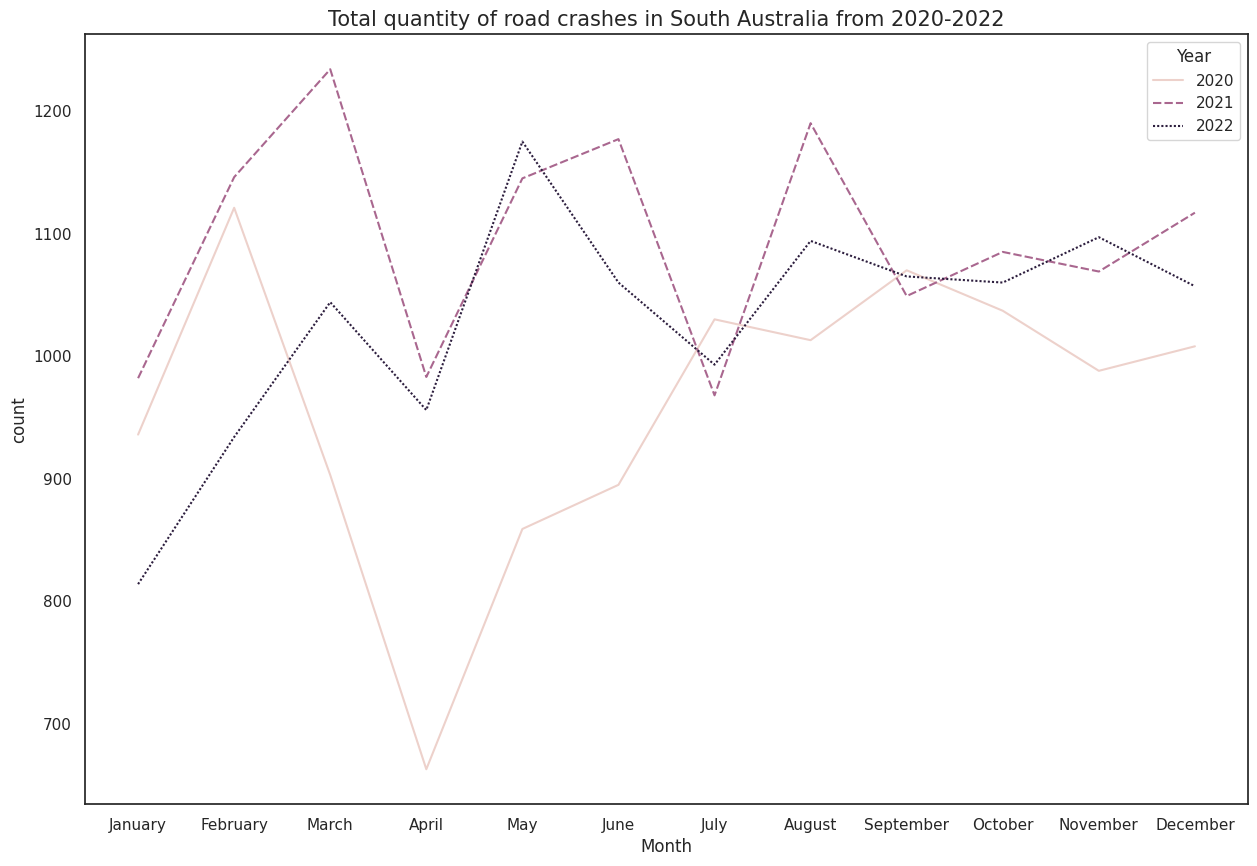

In [64]:
# Line plot of total quantity of road crashes in SA from 2020-2022
plt.figure(figsize = (15,10))
sns.lineplot(x='Month', y='count', data=total_crash_2020_2022, hue = 'Year', style = 'Year')
plt.title('Total quantity of road crashes in South Australia from 2020-2022', size = 15)
plt.show()

### Severity level and Stats Area

In [65]:
# # Table of the total number of road crashes by Severity level and Stats Area, over years from 2020-2022
# CSEF_pdo = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['CSEF Severity'] == '1: PDO'].groupby(['CSEF Severity', 'Stats Area', 'Stat_area', 'Severity'])['Total Units'].sum()).reset_index()

# CSEF_mi = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['CSEF Severity'] == '2: MI'].groupby(['CSEF Severity', 'Stats Area', 'Stat_area', 'Severity'])['Total Units'].sum()).reset_index()

# CSEF_si = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['CSEF Severity'] == '3: SI'].groupby(['CSEF Severity', 'Stats Area', 'Stat_area', 'Severity'])['Total Units'].sum()).reset_index()

# CSEF_fatal = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['CSEF Severity'] == '4: Fatal'].groupby(['CSEF Severity', 'Stats Area', 'Stat_area', 'Severity'])['Total Units'].sum()).reset_index()

# CSEF_df = pd.concat([CSEF_mi, CSEF_si, CSEF_fatal])
# CSEF_df

> Crashes are categorized into four main categories which are Fatality, Property Damage Only, Serious Injury, and Minor Injury.

> In Proper Damage Only and Minor Injury classes, the majority of crashes occurring in Metropolitan which can be five times higher than the figure for Country and more than 10 times higher than the figure for City.

> In Serious Damage, the proportion of crashes happening in Country was much higher than its proportion in other severity categories. Particularly, the quantity of crashes happened in Country were about a half of the figure for Metropolitan area.

> In Fatality, the number of crashes occured in the Country was even slightly higher than the figure for Metropolitan areas, and City has no road crashes with fatalities.


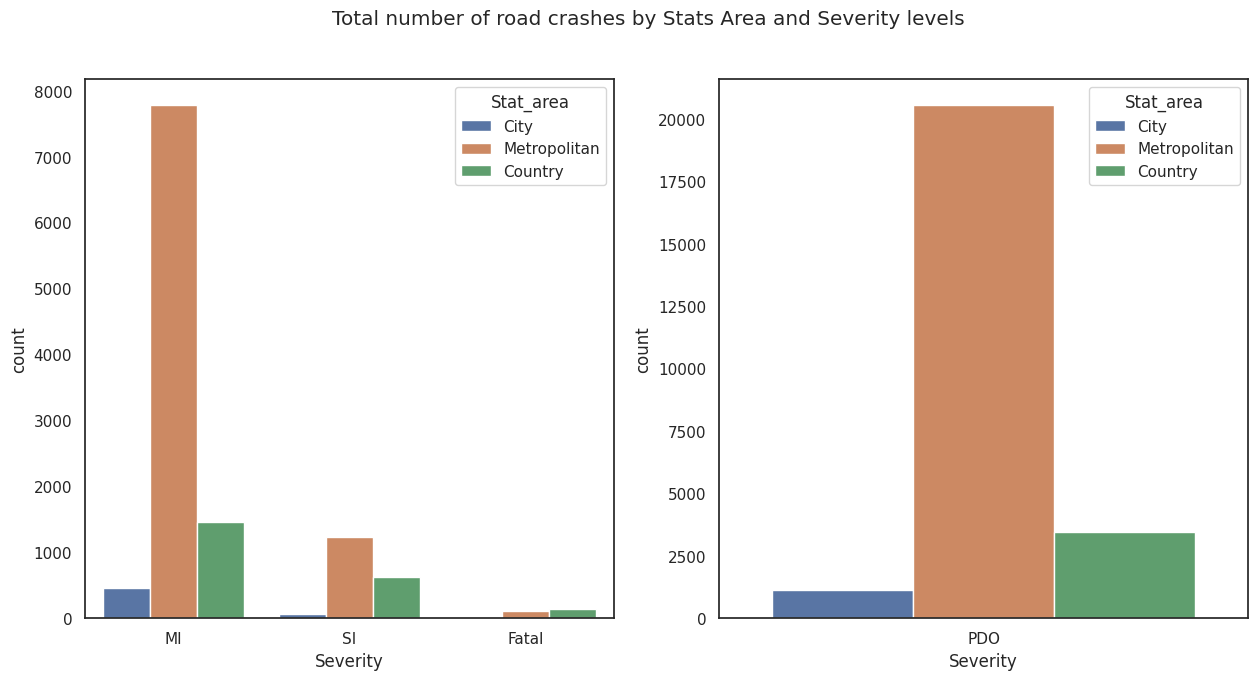

In [70]:
# Bar plots of total number of road crashes by Stats Area and Severity levels
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
sns.barplot(ax = axs[0], x= CSEF_df.Severity, y=CSEF_df['count'], hue = CSEF_df['Stat_area'])
sns.barplot(ax = axs[1], x= CSEF_pdo.Severity, y=CSEF_pdo['count'], hue = CSEF_pdo['Stat_area'])
plt.suptitle('Total number of road crashes by Stats Area and Severity levels')
plt.show()

### Severity level, Stats Area and Area Speed

> The area speed (shown in red lines) in Country was the highest, followed by the figure for Metropolitan, and the least speed was in City. This can be why least crashes happening in the City.

> The majority of road crashses happened in areas allowing speeds between 50km/h and 60km/h, which are driving speeds in the Metropolitan areas. There is not a lot of road crashes happened in Country areas, which allow up to 100km/h. Although the area speed of Metropolitan was lower than the figure for Country, the total quantity of road crashes in Metropolitan was much higher than the figure for Country, it can be because there is a lot more vehicles travelling on roads in Metropolitan than in Country. Therefore, area speed might be not a major factor affecting the quantity of road crashes, but the number of vehicles travelling on roads may be a significant factor.

> In Country areas, generally, the increase in area speed can result in the higher level of severity of road crashes. That can be why there was higher quantity of road crashes with fatalities in Country than in other areas.

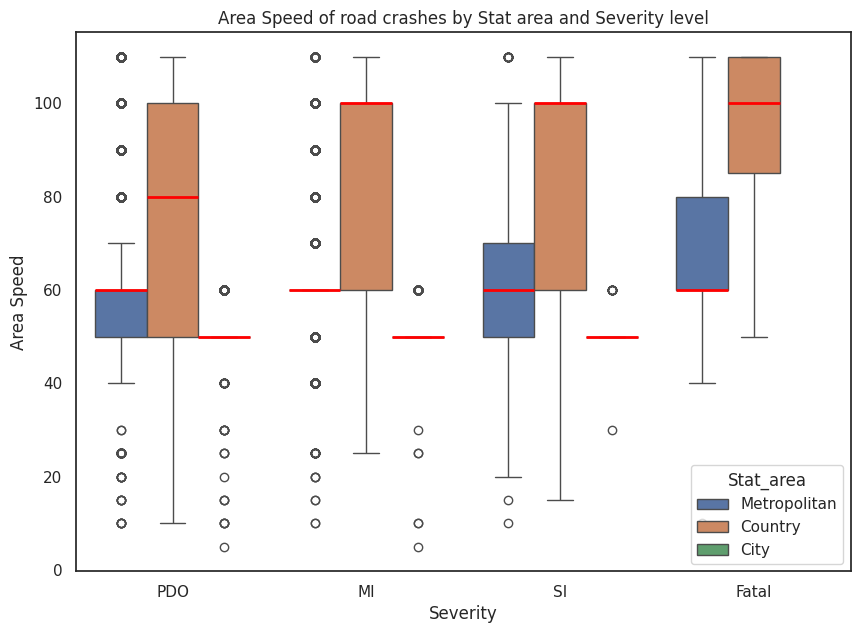

In [71]:
# Speed and Severity Level
plt.figure(figsize = (10,7))
sns.boxplot(data = full_crash_2020_2022, x = 'Severity', y = 'Area Speed', hue = 'Stat_area', medianprops={"color": "red", "linewidth": 2})
plt.title('Area Speed of road crashes by Stat area and Severity level')
plt.show()

### Road Condition and Traffic Control

> Most of road crashes happened on sealed roads, instead of unsealed roads. It can be because sealed roads can be constructed mostly in metropolitan areas, and major highways are always sealed. On the contrary, many roads in the countryside and remote areas may be unsealed. Therefore, the total number of road crashes happening on sealed roads were higher than the figure for unsealed roads because a lot more vehices travelling in Metropolitan and highways connecting states, than in Country areas.

> Less crashes happening on sealed roads in 2022 than in 2021, especially in Metropolitan area. In addition, most crashes occurred in T-Junction, Cross Road, Not Divided Road and Divided Road.

In [73]:
# # Table of total road crashes by Year, Road surface, and Stat area
# full_crash_2020_2022[full_crash_2020_2022['Road Surface'] != 'Unknown'].groupby(['Year', 'Stat_area', 'Road Surface'])['Total Units'].sum()

In [86]:
# Table of total road crashes by Year, Road surface, and Stat area
roadsurface_statarea = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Road Surface'] != 'Unknown'].groupby(['Year', 'Stat_area'])['Road Surface'].value_counts()).reset_index()
roadsurface_statarea.columns = ['Year',	'Stat_area',	'Road Surface',	'Total crashes']
roadsurface_statarea

,Year,Stat_area,Road Surface,Total crashes
0,2020,City,Sealed,477
1,2020,City,Unsealed,2
2,2020,Country,Sealed,1471
3,2020,Country,Unsealed,278
4,2020,Metropolitan,Sealed,9197
5,2020,Metropolitan,Unsealed,97
6,2021,City,Sealed,600
7,2021,City,Unsealed,6
8,2021,Country,Sealed,1687
9,2021,Country,Unsealed,288


In [76]:
# Table of total road crashes by Year, and Position Type
pd.DataFrame(full_crash_2020_2022.groupby(['Year'])['Position Type'].value_counts()).reset_index()

,Year,Position Type,count
0,2020,Not Divided,3852
1,2020,T-Junction,2667
2,2020,Cross Road,2338
3,2020,Divided Road,2169
4,2020,Freeway,204
5,2020,Multiple,104
6,2020,Pedestrian Crossing,70
7,2020,Other,37
8,2020,Rail Crossing,17
9,2020,One Way,15


> The highest number of crashes occurred on straight road, followed by Curved road with Open View. In addition, more than 85% of road crashes caused minor injuries or Property Damage Only happened on straight roads. But in terms of crashes with serious injuries and fatalities, it can be seen that the proportion of Curved road with open view was much higher than its figure for other severity levels, which mean that curved roads can be one of main factors lead to crashes with higher severity levels. In terms of road crashes with fatalities, upto 30% total road crashes occurred on Curved road with View open.

In [77]:
# # Table of total road crashes by Stat area, Horizontal Align, and Vertical Align
# align_area = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['Horizontal Align'] != 'Unknown') & (full_crash_2020_2022['Vertical Align'] != 'Unknown')].groupby(['Stat_area', 'Horizontal Align', 'Vertical Align'])['Total Units'].sum()).reset_index()
# align_area

In [80]:
# Table of total road crashes by Stat area, Horizontal Align, and Vertical Align
align_area = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['Horizontal Align'] != 'Unknown') & (full_crash_2020_2022['Vertical Align'] != 'Unknown')].groupby('Stat_area')[['Horizontal Align', 'Vertical Align']].value_counts()).reset_index()
align_area

,Stat_area,Horizontal Align,Vertical Align,count
0,City,Straight road,Level,1479
1,City,"CURVED, VIEW OPEN",Level,67
2,City,Straight road,Slope,44
3,City,"CURVED, VIEW OPEN",Slope,18
4,City,Straight road,Crest of Hill,9
5,City,"CURVED, VIEW OBSCURED",Level,5
6,City,Straight road,Bottom of Hill,5
7,City,"CURVED, VIEW OPEN",Bottom of Hill,3
8,City,"CURVED, VIEW OPEN",Crest of Hill,2
9,City,"CURVED, VIEW OBSCURED",Slope,1


In [81]:
# # Proportion of each Horizontal Align by Severity level
# halign_severity = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['Horizontal Align'] != 'Unknown') & (full_crash_2020_2022['Vertical Align'] != 'Unknown')].groupby(['Severity', 'Horizontal Align'])['Total Units'].sum()).reset_index()
# halign_severity_total = pd.DataFrame(halign_severity.groupby('Severity')['Total Units'].sum()).reset_index()
# halign_severity = halign_severity.merge(halign_severity_total, on = 'Severity')
# halign_severity.columns = ['Severity', 'Horizontal Align', 'Total Crashes by Horiztontal Align and Severity', 'Total crashes']
# halign_severity['Prop'] = halign_severity['Total Crashes by Horiztontal Align and Severity'] / halign_severity['Total crashes'] * 100
# halign_severity

In [85]:
# Proportion of each Horizontal Align by Severity level
halign_severity = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['Horizontal Align'] != 'Unknown') & (full_crash_2020_2022['Vertical Align'] != 'Unknown')].groupby('Severity')['Horizontal Align'].value_counts()).reset_index()
halign_severity_total = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['Horizontal Align'] != 'Unknown') & (full_crash_2020_2022['Vertical Align'] != 'Unknown')]['Severity'].value_counts()).reset_index()
halign_severity = halign_severity.merge(halign_severity_total, on = 'Severity')
halign_severity.columns = ['Severity', 'Horizontal Align', 'Total Crashes by Horiztontal Align and Severity', 'Total crashes']
halign_severity['Proportion (%)'] = halign_severity['Total Crashes by Horiztontal Align and Severity'] / halign_severity['Total crashes'] * 100
halign_severity

,Severity,Horizontal Align,Total Crashes by Horiztontal Align and Severity,Total crashes,Proportion (%)
0,Fatal,Straight road,155,246,63.00813
1,Fatal,"CURVED, VIEW OPEN",72,246,29.268293
2,Fatal,"CURVED, VIEW OBSCURED",19,246,7.723577
3,MI,Straight road,8270,9678,85.45154
4,MI,"CURVED, VIEW OPEN",984,9678,10.16739
5,MI,"CURVED, VIEW OBSCURED",424,9678,4.38107
6,PDO,Straight road,21828,25095,86.98147
7,PDO,"CURVED, VIEW OPEN",2373,25095,9.456067
8,PDO,"CURVED, VIEW OBSCURED",894,25095,3.562463
9,SI,Straight road,1407,1890,74.444444


> The majority of crashes happened on roads without any traffic control signs. The second highest figure was for Traffic Signals in Metropolitan and City, and Give Way Sign in Country. Hence it raises a need to check traffic signals to evaluate if they are effective in controlling the traffic and whether new necessary control signals should be established on roads.

In [106]:
traffic_area = pd.DataFrame(full_crash_2020_2022.groupby(['Stat_area'])['Traffic Ctrls'].value_counts()).reset_index().sort_values(by = ['Stat_area', 'count', 'Traffic Ctrls'], ascending = False)
traffic_area

,Stat_area,Traffic Ctrls,count
15,Metropolitan,No Control,19528
16,Metropolitan,Traffic Signals,5673
17,Metropolitan,Give Way Sign,1957
18,Metropolitan,Roundabout,1314
19,Metropolitan,Stop Sign,1148
20,Metropolitan,Rail Xing - Boom,29
21,Metropolitan,Rail Xing-Traffic Signals,23
22,Metropolitan,Other,14
23,Metropolitan,Rail Xing - Flashing,5
6,Country,No Control,4649


<Figure size 2000x2000 with 0 Axes>

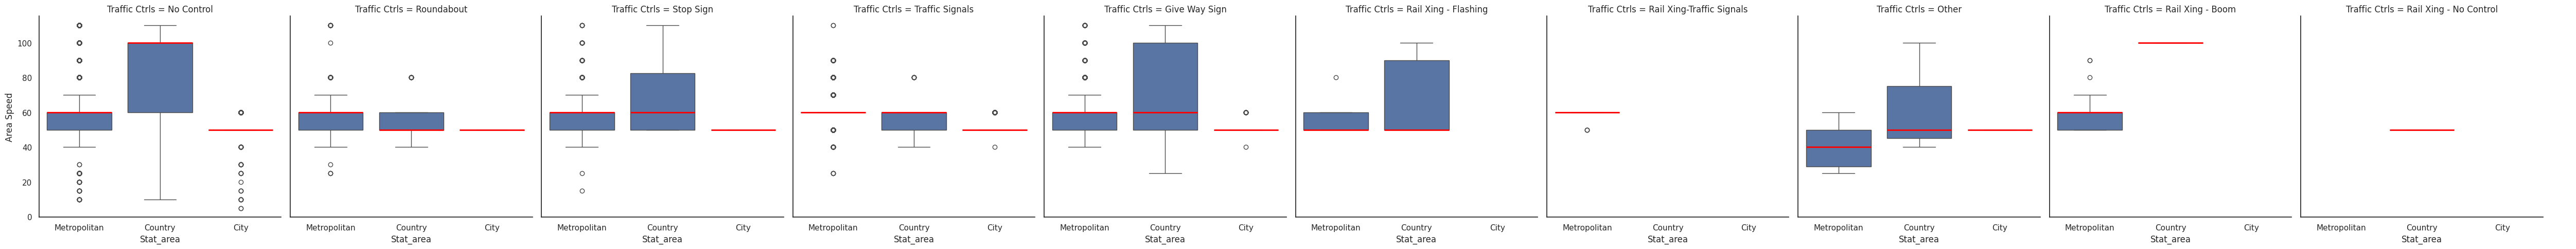

In [ ]:
# Area speed by Stat area, and Traffic Ctrls
plt.figure(figsize = (20,20))
g = sns.FacetGrid(full_crash_2020_2022, col="Traffic Ctrls", height = 5)
g.map_dataframe(sns.boxplot, medianprops={"color": "red", "linewidth": 2}, x="Stat_area", y = 'Area Speed')
g.add_legend()
plt.show()

### Weather condition and DayNight

In [89]:
# # Table of total number of road crashes by Stat area, DayNight and Weather condition
# weather_time = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] != 'Unknown') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby(['Stat_area','DayNight', 'Weather Cond'])['Total Units'].sum()).reset_index()
# weather_time

In [95]:
pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] != 'Unknown') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby(['Year'])['Weather Cond'].value_counts()).reset_index()


,Year,Weather Cond,count
0,2020,Not Raining,10422
1,2020,Raining,1070
2,2021,Not Raining,11997
3,2021,Raining,1103
4,2022,Not Raining,10770
5,2022,Raining,1471


In [92]:
# Table of total number of road crashes by Stat area, DayNight and Weather condition
weather_time = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] != 'Unknown') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby('Stat_area')[['DayNight', 'Weather Cond']].value_counts()).reset_index()
weather_time

,Stat_area,DayNight,Weather Cond,count
0,City,Daylight,Not Raining,1134
1,City,Night,Not Raining,354
2,City,Daylight,Raining,89
3,City,Night,Raining,51
4,Country,Daylight,Not Raining,3639
5,Country,Night,Not Raining,1349
6,Country,Daylight,Raining,388
7,Country,Night,Raining,250
8,Metropolitan,Daylight,Not Raining,21264
9,Metropolitan,Night,Not Raining,5449


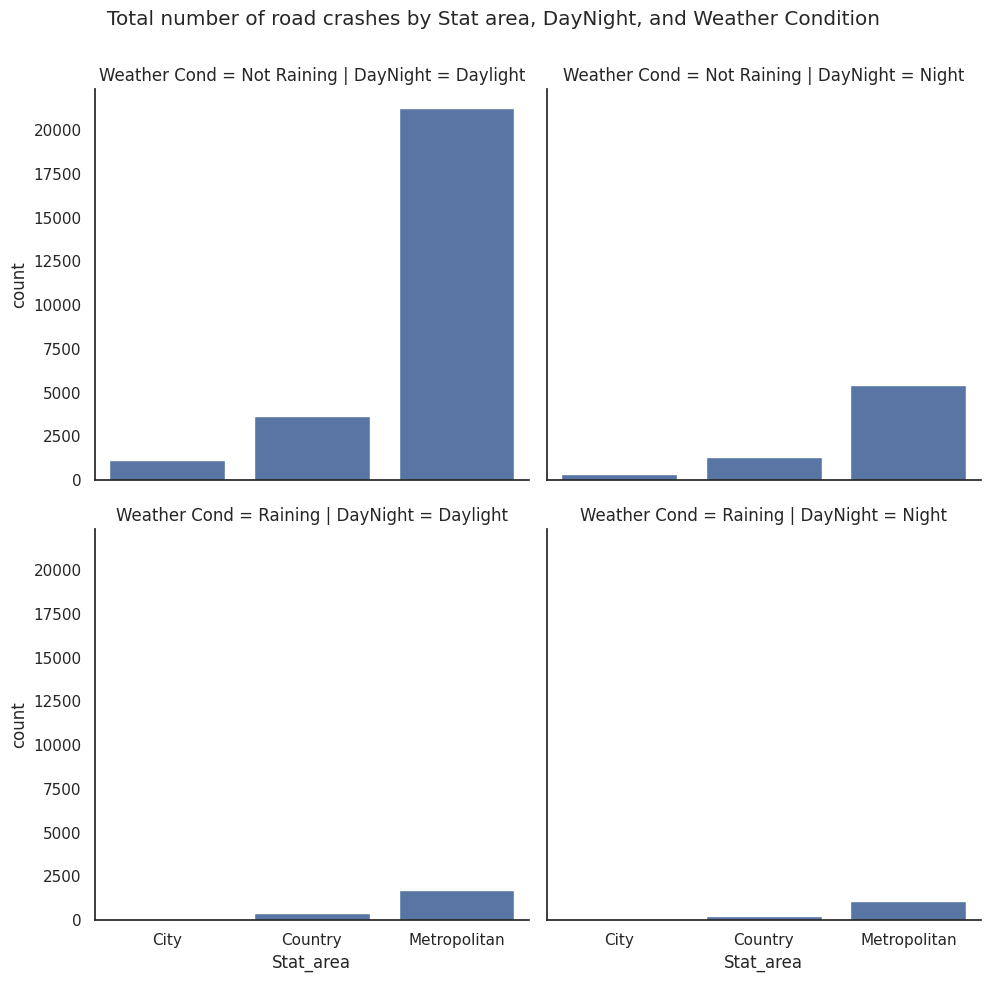

In [93]:
# Plot of Total number of road crashes by Stat area, DayNight, and Weather Condition
g = sns.FacetGrid(weather_time, col="DayNight", row = 'Weather Cond', height = 5)
g.fig.suptitle('Total number of road crashes by Stat area, DayNight, and Weather Condition \n')
g.map_dataframe(sns.barplot, x="Stat_area", y = 'count')
g.add_legend()
plt.show()

> In general, the majority of crashes happened in no raining condition. The proportion of crashes in no raining condition in 2022 was lower than the figure for 2021. However, the opposite was true for raining condition, because the percentage of crashes occuring in raining condition in 2022 was higher than the figure for 2021.

> Most of crashes occurred on daylight instead of night, on both raining and not raining condition. In addition, during raining condition, the quantity of road crashes happend during daylight was even higher than the figure for night. This issue happened can be because of human perspective. When people drive during daylight, they can have clearer visibility, hence they can drive less carefully than at night, and it leads to higher quantity of crashes during daylight than night.

> In addition, the proportion of some crash types such as Hit fixed object, hit object on road, and hit pedestrian was higher at night on raining condition than during daylight. For example, in terms of Hit Object on Road, during daylight, only about 10% of crashes due to the rain. However, at night, more than 23% of crashes occurred because of the rain.


In [102]:
daylight_weather = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] == 'Daylight') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby(['DayNight','Weather Cond'])['Crash Type'].value_counts()).reset_index()
night_weather = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] == 'Night') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby(['DayNight', 'Weather Cond'])['Crash Type'].value_counts()).reset_index()

total_daylight = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] == 'Daylight') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby('DayNight')['Crash Type'].value_counts()).reset_index()
total_night = pd.DataFrame(full_crash_2020_2022[(full_crash_2020_2022['DayNight'] == 'Night') & (full_crash_2020_2022['Weather Cond'] != 'Unknown')].groupby('DayNight')['Crash Type'].value_counts()).reset_index()

daylight_weather= daylight_weather.merge(total_daylight, on = ['DayNight', 'Crash Type'])
night_weather= night_weather.merge(total_night, on = ['DayNight', 'Crash Type'])

daylight_weather.columns = ['DayNight', 'Weather Cond', 'Crash Type', 'Total crashes by Weather cond', 'Total crashes']
night_weather.columns = ['DayNight', 'Weather Cond', 'Crash Type', 'Total crashes by Weather cond', 'Total crashes']

daylight_weather['Prop'] = daylight_weather['Total crashes by Weather cond']/ daylight_weather['Total crashes'] * 100
night_weather['Prop'] = night_weather['Total crashes by Weather cond']/ night_weather['Total crashes'] * 100

In [104]:
daylight_weather[daylight_weather['Crash Type'] == 'Hit Object on Road']

,DayNight,Weather Cond,Crash Type,Total crashes by Weather cond,Total crashes,Prop
12,Daylight,Not Raining,Hit Object on Road,78,86,90.697674
25,Daylight,Raining,Hit Object on Road,8,86,9.302326


In [105]:
night_weather[night_weather['Crash Type'] == 'Hit Object on Road']

,DayNight,Weather Cond,Crash Type,Total crashes by Weather cond,Total crashes,Prop
11,Night,Not Raining,Hit Object on Road,50,65,76.923077
23,Night,Raining,Hit Object on Road,15,65,23.076923


### Human Behaviour and Responsible Entity

> Most crashes happened when there was no DUI or Drugs Involved. And the proportion of crashes with DUI or Drug Involves was negligible, in comparison to the figure of no DUI and no Drugs.

In [107]:
# Total number of road crashes by Stat area, DUI Involved, and Drugs Involved
dui_drug = pd.DataFrame(full_crash_2020_2022.groupby(['Stat_area'])[['DUI Involved', 'Drugs Involved']].value_counts()).reset_index()
dui_drug

,Stat_area,DUI Involved,Drugs Involved,count
0,City,N,N,1574
1,City,Y,N,42
2,City,N,Y,17
3,City,Y,Y,1
4,Country,N,N,5094
5,Country,Y,N,318
6,Country,N,Y,220
7,Country,Y,Y,60
8,Metropolitan,N,N,28307
9,Metropolitan,Y,N,814


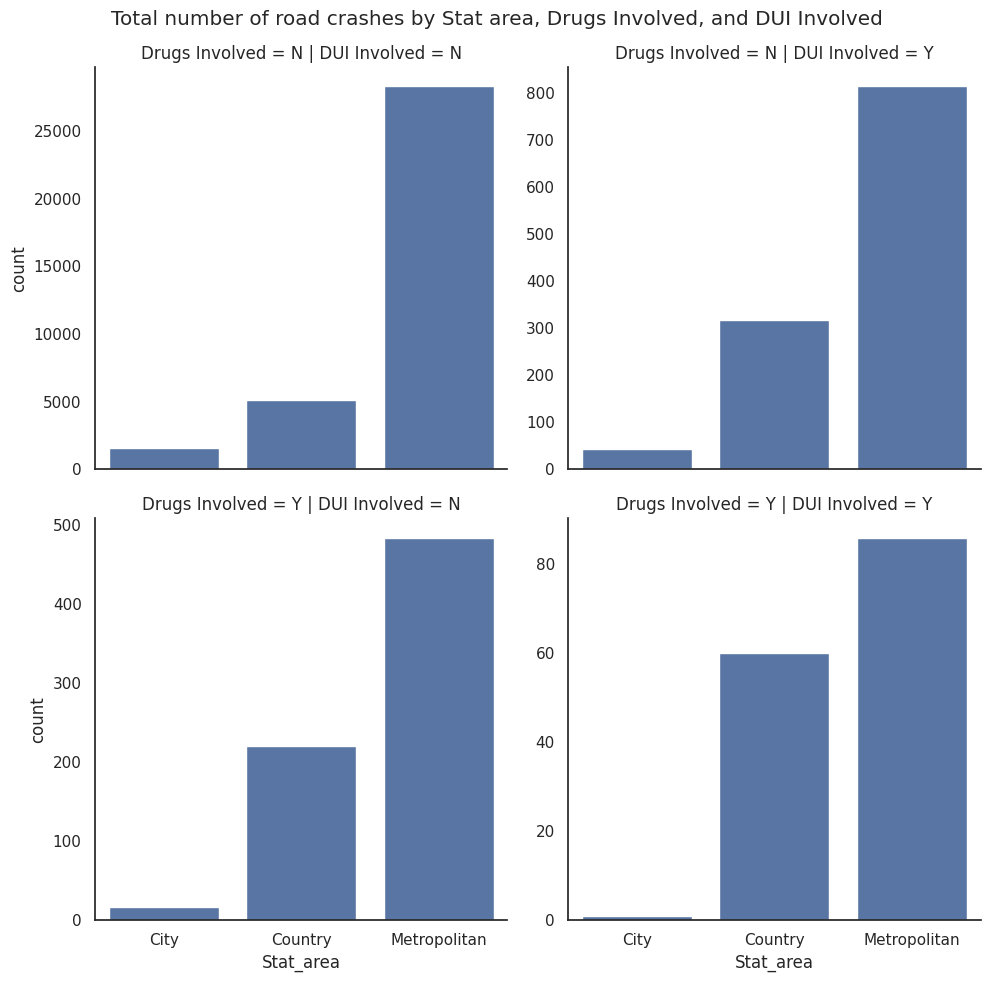

In [108]:
g = sns.FacetGrid(dui_drug, col="DUI Involved", row = 'Drugs Involved', height = 5, sharey = False)
g.fig.suptitle('Total number of road crashes by Stat area, Drugs Involved, and DUI Involved')
g.map_dataframe(sns.barplot, x="Stat_area", y = 'count')
g.add_legend()
plt.show()

In [110]:
# Total number of road crashes by Severity level, DUI Involved, and Drugs Involved
dui_drug_severity = pd.DataFrame(full_crash_2020_2022.groupby('Severity')[['DUI Involved', 'Drugs Involved']].value_counts()).reset_index()
dui_drug_severity

,Severity,DUI Involved,Drugs Involved,count
0,Fatal,N,N,159
1,Fatal,Y,N,40
2,Fatal,N,Y,32
3,Fatal,Y,Y,15
4,MI,N,N,8929
5,MI,N,Y,369
6,MI,Y,N,333
7,MI,Y,Y,72
8,PDO,N,N,24379
9,PDO,Y,N,638


> In crashes having injuries and fatalities, the contribution of crashes DUI involved and Drug involved were higher than its proportion in crashes with Property damage only. It means if a crash has injuries, or fatalities, it is more likely that there is a participation of DUI and Drugs.

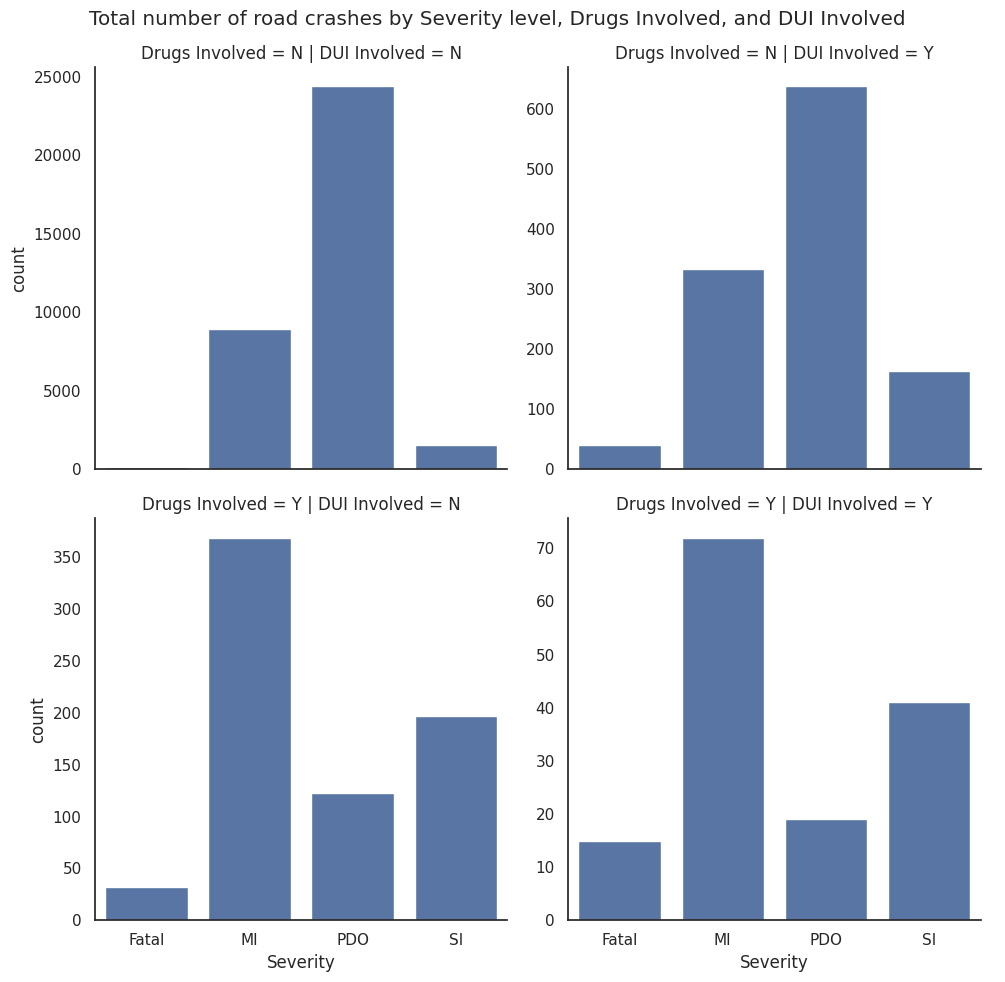

In [111]:
g = sns.FacetGrid(dui_drug_severity, col="DUI Involved", row = 'Drugs Involved', height = 5, sharey = False)
g.fig.suptitle('Total number of road crashes by Severity level, Drugs Involved, and DUI Involved')
g.map_dataframe(sns.barplot, x="Severity", y = 'count')
g.add_legend()
plt.show()

> The quantity of crashes with DUI involved in hit fixed object was larger than other types. The figure for Drug Involved also saw the same thing.

In [112]:
dui_df = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['DUI Involved'] == 'Y'].groupby(['Stat_area','DUI Involved'])['Crash Type'].value_counts()).reset_index().sort_values(by = ['Stat_area', 'count'], ascending = False)
dui_df

,Stat_area,DUI Involved,Crash Type,count
21,Metropolitan,Y,Hit Fixed Object,439
22,Metropolitan,Y,Hit Parked Vehicle,143
23,Metropolitan,Y,Rear End,103
24,Metropolitan,Y,Right Angle,59
25,Metropolitan,Y,Roll Over,44
26,Metropolitan,Y,Right Turn,28
27,Metropolitan,Y,Hit Pedestrian,26
28,Metropolitan,Y,Head On,24
29,Metropolitan,Y,Side Swipe,21
30,Metropolitan,Y,Left Road - Out of Control,11


In [116]:
drug_df = pd.DataFrame(full_crash_2020_2022[full_crash_2020_2022['Drugs Involved'] == 'Y'].groupby(['Stat_area','Drugs Involved'])['Crash Type'].value_counts()).reset_index().sort_values(by = ['Stat_area', 'count'], ascending = False)
drug_df

,Stat_area,Drugs Involved,Crash Type,count
20,Metropolitan,Y,Hit Fixed Object,194
21,Metropolitan,Y,Rear End,80
22,Metropolitan,Y,Right Angle,77
23,Metropolitan,Y,Right Turn,56
24,Metropolitan,Y,Roll Over,52
25,Metropolitan,Y,Hit Parked Vehicle,46
26,Metropolitan,Y,Head On,29
27,Metropolitan,Y,Side Swipe,23
28,Metropolitan,Y,Left Road - Out of Control,5
29,Metropolitan,Y,Hit Animal,3


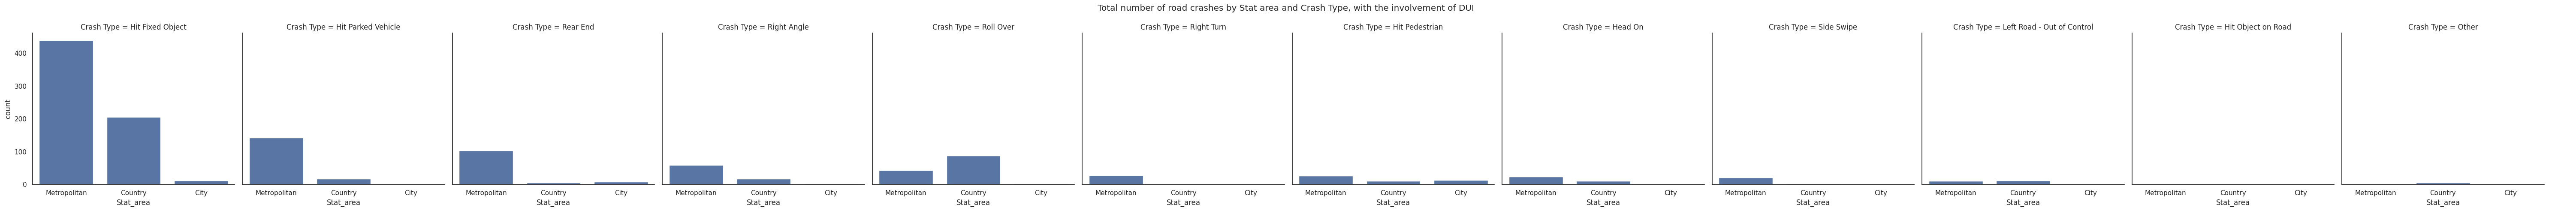

In [117]:
g = sns.FacetGrid(dui_df[dui_df['DUI Involved']== 'Y'], col="Crash Type", height = 5)
g.fig.suptitle('Total number of road crashes by Stat area and Crash Type, with the involvement of DUI')
g.map_dataframe(sns.barplot, x="Stat_area", y = 'count')
g.add_legend()
plt.show()

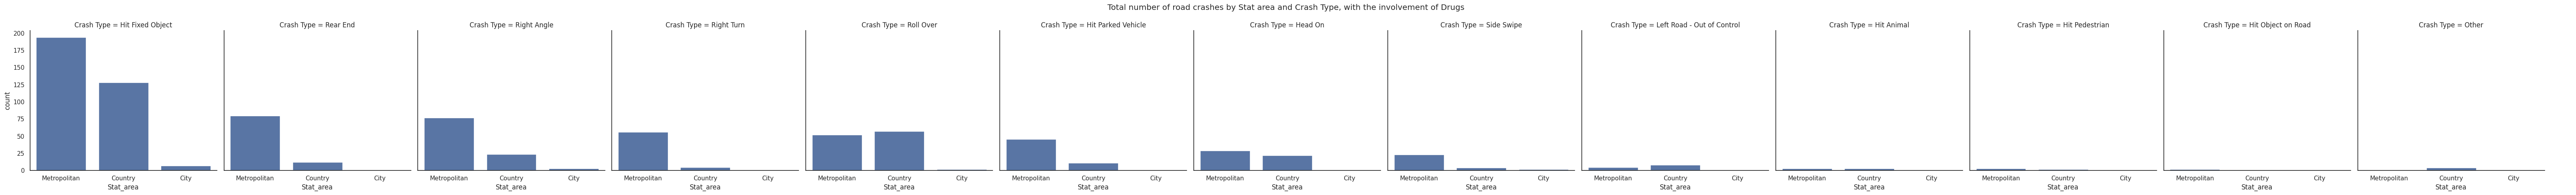

In [118]:
g = sns.FacetGrid(drug_df[drug_df['Drugs Involved']== 'Y'], col="Crash Type", height = 5)
g.fig.suptitle('Total number of road crashes by Stat area and Crash Type, with the involvement of Drugs')
g.map_dataframe(sns.barplot, x="Stat_area", y = 'count')
g.add_legend()
plt.show()

In [119]:
# Total number of road crashes by Severity level, Entity code, and Stat area
responsibility = pd.DataFrame(full_crash_2020_2022.groupby(['Severity', 'Entity Code'])['Stat_area'].value_counts()).reset_index()
responsibility

,Severity,Entity Code,Stat_area,count
0,Fatal,Animal,Country,2
1,Fatal,Driver Rider,Country,125
2,Fatal,Driver Rider,Metropolitan,95
3,Fatal,Other,Country,1
4,Fatal,Other,Metropolitan,1
5,Fatal,Passenger,Country,2
6,Fatal,Pedestrian,Metropolitan,11
7,Fatal,Pedestrian,Country,9
8,MI,Animal,Country,46
9,MI,Animal,Metropolitan,28


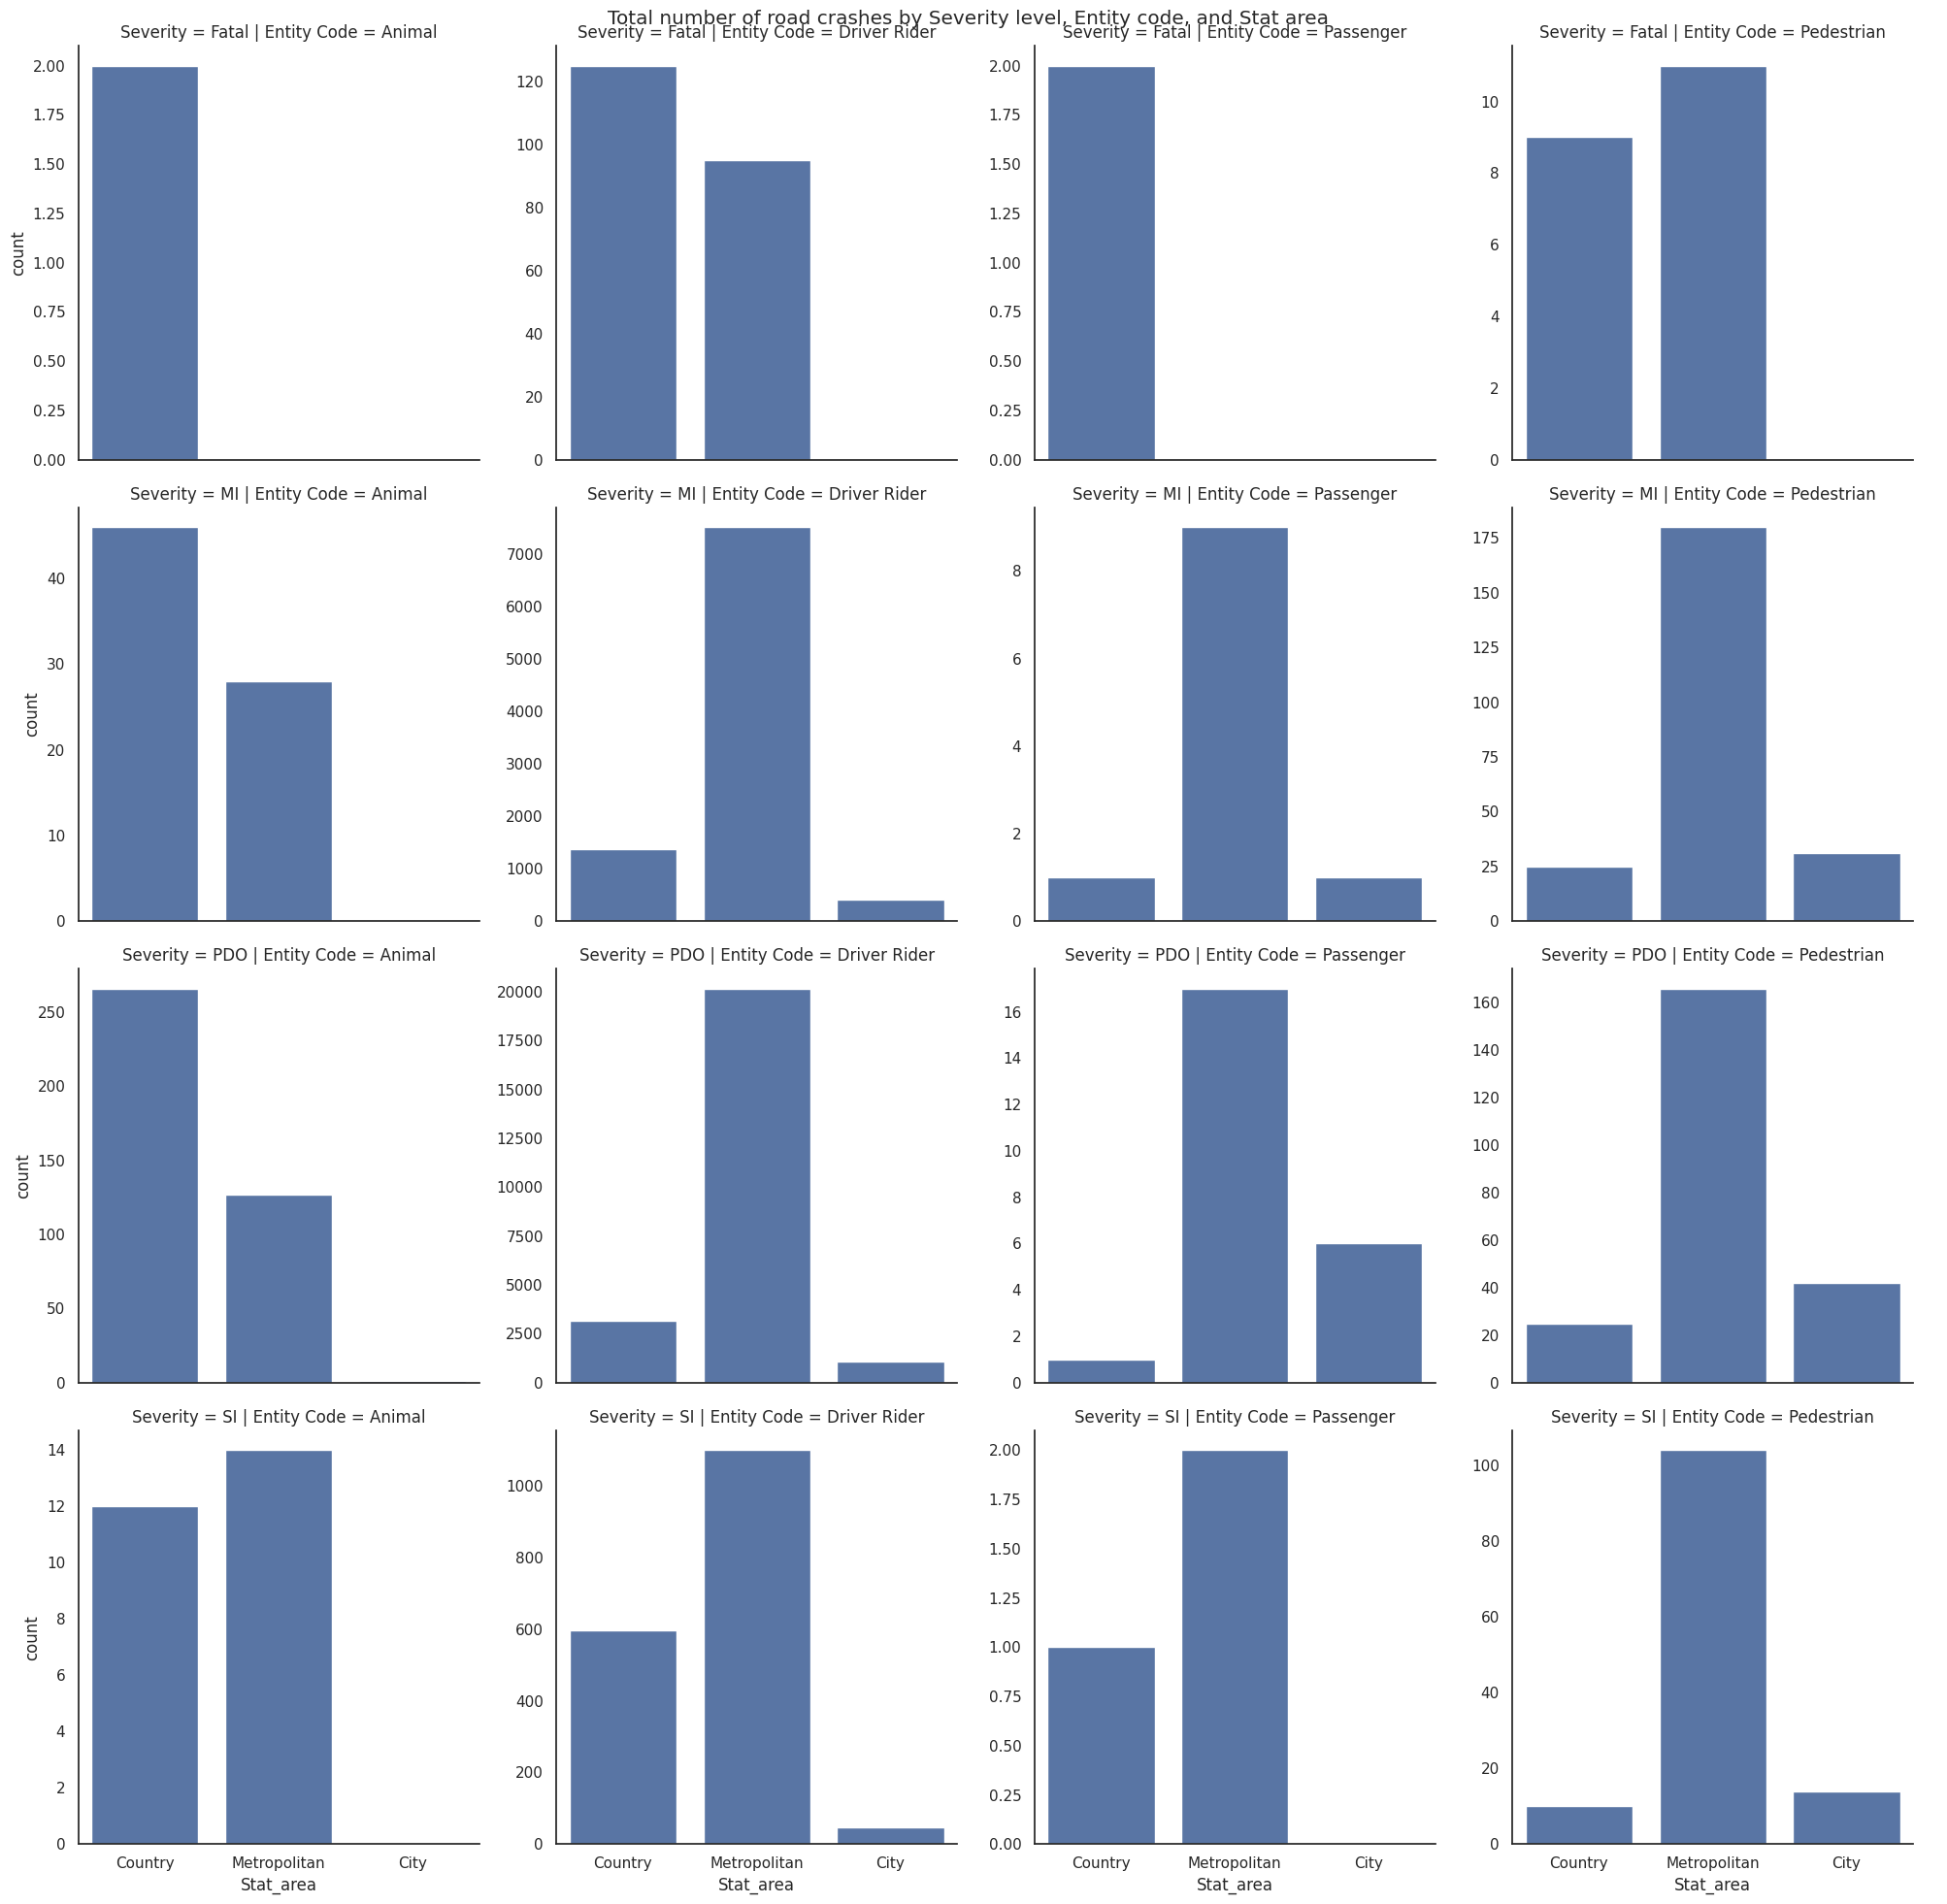

In [120]:
g = sns.FacetGrid(data = responsibility[(responsibility['Entity Code'] != 'No Unit or User Responsible') & (responsibility['Entity Code'] != 'Other')], row = 'Severity', col = 'Entity Code', height = 5, sharey = False)
g.fig.suptitle('Total number of road crashes by Severity level, Entity code, and Stat area')
g.map_dataframe(sns.barplot, x = 'Stat_area', y = 'count')
g.add_legend()

In [123]:
severity_entity = pd.DataFrame(full_crash_2020_2022.groupby('Severity')['Entity Code'].value_counts()).reset_index()
severity_entity

,Severity,Entity Code,count
0,Fatal,Driver Rider,220
1,Fatal,Pedestrian,20
2,Fatal,Animal,2
3,Fatal,Other,2
4,Fatal,Passenger,2
5,MI,Driver Rider,9319
6,MI,Pedestrian,236
7,MI,Animal,74
8,MI,Other,63
9,MI,Passenger,11


<ipython-input-130-8df8ef54afb7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


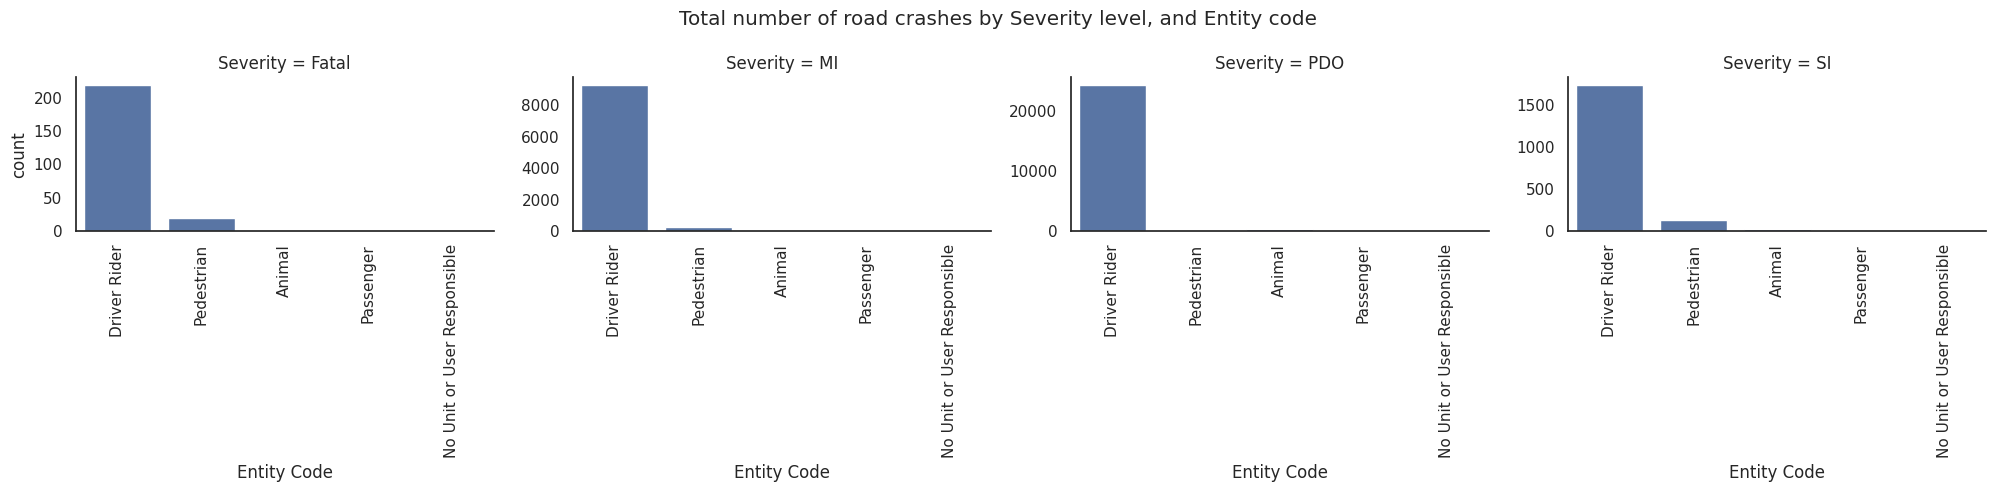

In [130]:
g = sns.FacetGrid(data = severity_entity[(severity_entity['Entity Code'] != 'Other')], col = 'Severity', height = 5, sharey = False)
g.fig.suptitle('Total number of road crashes by Severity level, and Entity code')
g.map_dataframe(sns.barplot, x = 'Entity Code', y = 'count')
g.add_legend()

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

> Drivers take responsibility for most road crashes. Animals took responsibility for road crashes happening in Country and Metropolitan, not in City.

> In terms of road crashes with Serious Injury and Fatalities, the proportion of Pedestrian increased, which means that the responsibility of Pedestrian were more significant in crashes with higher severity levels.


In [137]:
severity_entity = pd.DataFrame(responsibility[(responsibility['Entity Code'] != 'No Unit or User Responsible') & (responsibility['Entity Code'] != 'Other')].groupby(['Severity', 'Entity Code'])['count'].sum()).reset_index()
severity_df = pd.DataFrame(responsibility.groupby(['Severity'])['count'].sum()).reset_index()
severity_entity_df = pd.DataFrame(severity_entity.merge(severity_df, on = 'Severity'))
severity_entity_df.columns = ['Severity', 'Entity Code', 'Total Crashes by Entity code', 'Total crashes']
severity_entity_df['Proportion(%)'] = severity_entity_df['Total Crashes by Entity code']/severity_entity_df['Total crashes']*100
severity_entity_df

,Severity,Entity Code,Total Crashes by Entity code,Total crashes,Proportion(%)
0,Fatal,Animal,2,246,0.813008
1,Fatal,Driver Rider,220,246,89.430894
2,Fatal,Passenger,2,246,0.813008
3,Fatal,Pedestrian,20,246,8.130081
4,MI,Animal,74,9703,0.762651
5,MI,Driver Rider,9319,9703,96.042461
6,MI,Passenger,11,9703,0.113367
7,MI,Pedestrian,236,9703,2.432237
8,PDO,Animal,394,25159,1.566040
9,PDO,Driver Rider,24358,25159,96.816249


## Linear correlation coefficients

In [138]:
full_crash_2020_2022.columns

Index(['Stats Area', 'Suburb', 'Postcode_y', 'LGA Name', 'Total Units',
       'Total Cas', 'Total Fats', 'Total SI', 'Total MI', 'Year', 'Month',
       'Day', 'Time', 'Area Speed', 'Position Type', 'Horizontal Align',
       'Vertical Align', 'Other Feat', 'Road Surface', 'Moisture Cond',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC', 'Crash Date Time', 'Postcode_x',
       'Position Type_encoded', 'Horizontal Align_encoded',
       'Vertical Align_encoded', 'Other Feat_encoded', 'Road Surface_encoded',
       'Moisture Cond_encoded', 'Weather Cond_encoded', 'DayNight_encoded',
       'Crash Type_encoded', 'Entity Code_encoded', 'Traffic Ctrls_encoded',
       'DUI Involved_encoded', 'Drugs Involved_encoded', 'Stat_area_encoded',
       'Stat_area', 'Severity_encoded', 'Severity'],
      dtype='object')

In [139]:
vars = ['Stat_area_encoded', 'Position Type_encoded', 'Horizontal Align_encoded',
       'Vertical Align_encoded', 'Other Feat_encoded', 'Road Surface_encoded',
       'Weather Cond_encoded', 'DayNight_encoded',
       'Crash Type_encoded', 'Entity Code_encoded', 'Traffic Ctrls_encoded',
       'DUI Involved_encoded', 'Drugs Involved_encoded', 'Severity_encoded', 'Total Units']

In [140]:
coef_df = full_crash_2020_2022[vars]

In [141]:
coef_df.corr()

,Stat_area_encoded,Position Type_encoded,Horizontal Align_encoded,Vertical Align_encoded,Other Feat_encoded,Road Surface_encoded,Weather Cond_encoded,DayNight_encoded,Crash Type_encoded,Entity Code_encoded,Traffic Ctrls_encoded,DUI Involved_encoded,Drugs Involved_encoded,Severity_encoded,Total Units
Stat_area_encoded,1.000000,0.055625,-0.160982,0.008218,-0.006151,0.251048,0.034198,0.040098,-0.147674,-0.066671,-0.203025,0.064237,0.069084,0.099413,-0.134281
Position Type_encoded,0.055625,1.000000,-0.045331,0.017059,0.020424,0.014973,-0.003600,-0.018668,-0.013968,-0.008384,-0.175574,0.012305,-0.001603,0.011548,-0.068011
Horizontal Align_encoded,-0.160982,-0.045331,1.000000,-0.165940,-0.027461,-0.149847,-0.070366,-0.070197,0.213532,0.026027,0.113184,-0.051756,-0.042166,-0.079103,0.094304
Vertical Align_encoded,0.008218,0.017059,-0.165940,1.000000,0.020085,0.009924,0.021284,0.012613,-0.079241,-0.013023,-0.064513,0.008738,0.013047,0.025703,-0.011622
Other Feat_encoded,-0.006151,0.020424,-0.027461,0.020085,1.000000,0.026966,0.019241,0.047815,-0.034547,0.016315,0.104425,0.017384,0.006813,-0.004268,-0.011996
Road Surface_encoded,0.251048,0.014973,-0.149847,0.009924,0.026966,1.000000,0.008044,0.013989,-0.039637,-0.020593,-0.088664,0.027737,0.010250,0.061305,-0.140393
Weather Cond_encoded,0.034198,-0.003600,-0.070366,0.021284,0.019241,0.008044,1.000000,0.129127,-0.089686,-0.012618,-0.012449,0.014197,-0.000042,-0.018049,-0.001816
DayNight_encoded,0.040098,-0.018668,-0.070197,0.012613,0.047815,0.013989,0.129127,1.000000,-0.220977,-0.020389,-0.013182,0.184936,0.058937,0.003400,-0.027274
Crash Type_encoded,-0.147674,-0.013968,0.213532,-0.079241,-0.034547,-0.039637,-0.089686,-0.220977,1.000000,-0.041093,0.218901,-0.146972,-0.072355,-0.016975,-0.110061
Entity Code_encoded,-0.066671,-0.008384,0.026027,-0.013023,0.016315,-0.020593,-0.012618,-0.020389,-0.041093,1.000000,-0.005821,0.022819,-0.014015,0.106413,-0.032977


<Axes: >

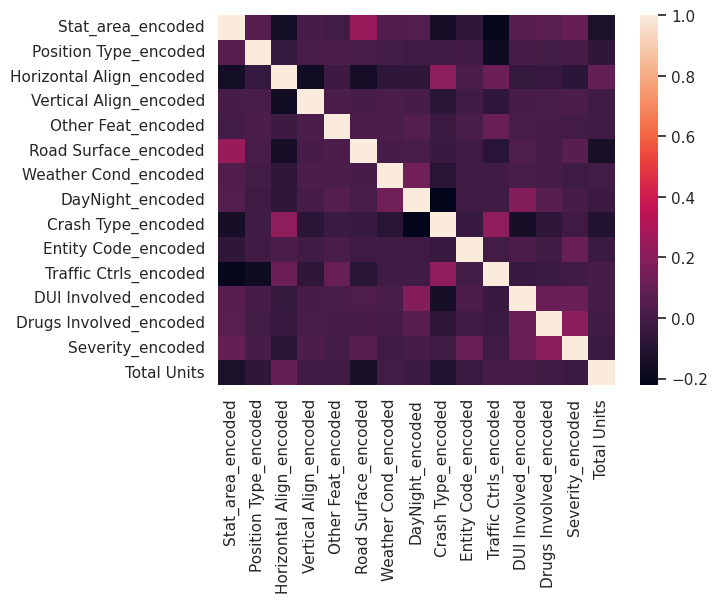

In [142]:
sns.heatmap(coef_df.corr())

> In general, factors included in this dataset seem not to have significant effect on the total number of road crashes, as well as the severity levels. However, some factors, which were more slight important to Total Units, were Stat area, Road surface, and Crash Type. Those relationship was negative, which means that when the encoded values of those factors decreased, the number of road crashes increased. For example, there were more road crashes occured on sealed roads (encoded as 1) than on unsealed roads (encoded as 2).

> Besides, to Severity level, Drugs involved was the most important variable among other considered factors. When road crashes happened with the participation of drugs (encoded as 1), the severity level was higher.